In [25]:
# Carregando algumas bibliotecas importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
plt.style.use('ggplot')
#plt.style.use('bmh')
#plt.style.use('dark_background')
#plt.style.use('grayscale')

In [26]:
jogos = pd.read_csv('../data/processed/matches_FLA2025_processed.csv')#, date_format={'kick-off': '%Y-%m-%d %H:%M:%S'})
gols = pd.read_csv('../data/processed/goal_scorers_2025_processed.csv')
stats = pd.read_csv('../data/processed/stats_FLA2025_processed.csv')#, date_format={'month': '%m', 'kick-off': '%Y-%m-%d %H:%M:%S'})

jogos['kick-off'] = pd.to_datetime(jogos['kick-off'], errors='coerce')
#stats['month'] = pd.to_datetime(stats['month'], format= '%b')
stats['kick-off'] = pd.to_datetime(stats['kick-off'], errors='coerce')

### Plotando Gráficos

#### Número de Gols por mês

In [28]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

gols_feitos_total = stats.groupby(stats['month'])['gols_marcados'].sum().reindex(new_order, axis=0)
gols_sofridos_total = stats.groupby(stats['month'])['gols_sofridos'].sum().reindex(new_order, axis=0)
jogos_mes = stats.groupby(stats['month'])['jogos_cumulativos'].count().reindex(new_order, axis=0)

saldo = gols_feitos_total - gols_sofridos_total

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

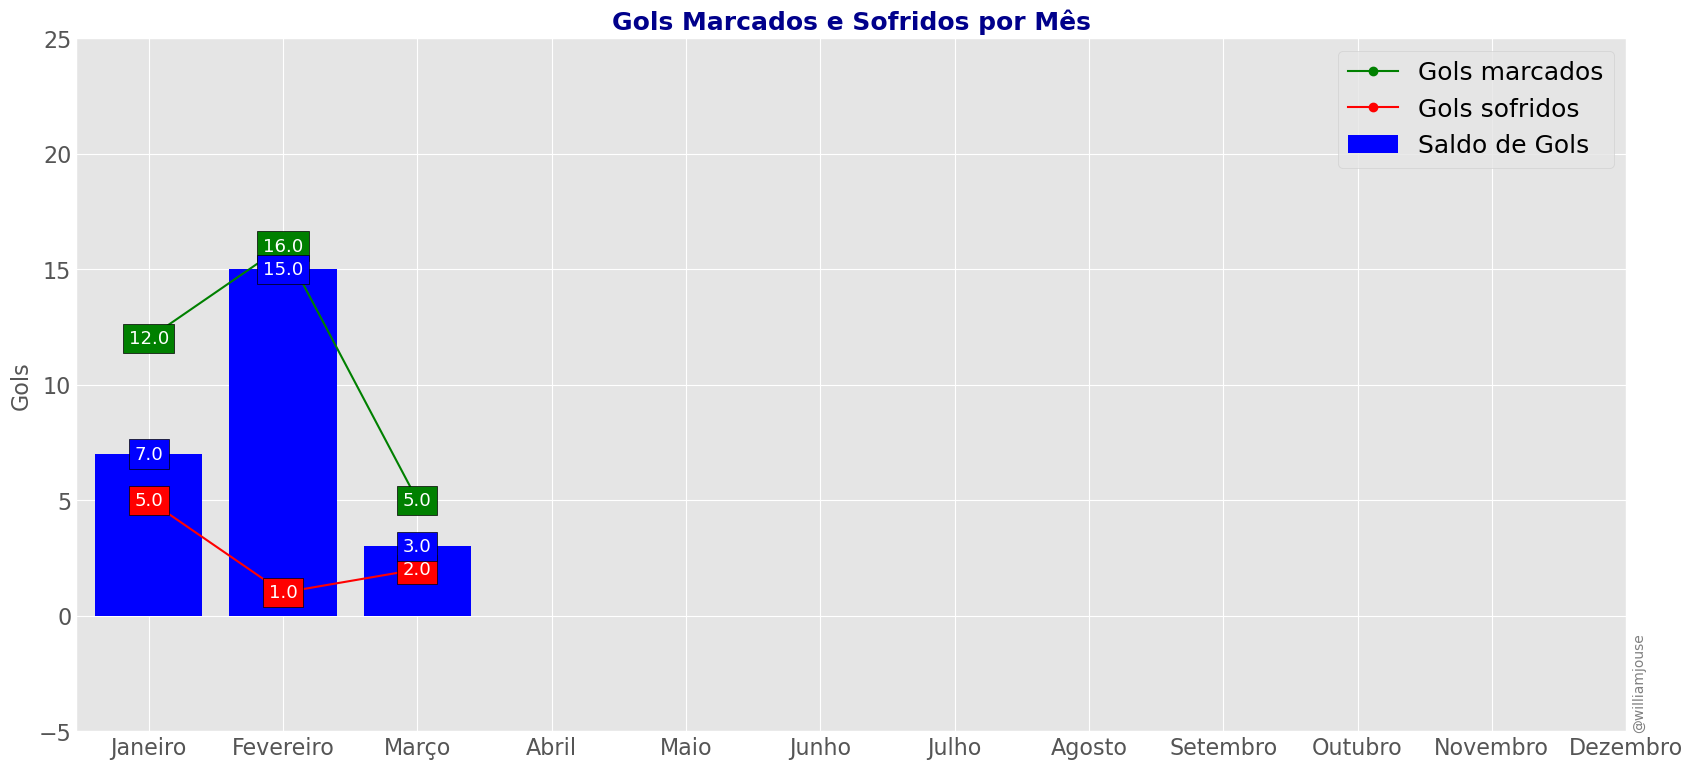

In [29]:
labels = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

fig, ax = plt.subplots(figsize=(20, 9))

cores = ['red' if saldo < 0 else 'blue' for saldo in saldo]

plt.title('Gols Marcados e Sofridos por Mês', fontsize=18, fontweight="bold", color="darkblue", loc="center")

plt.bar(saldo.index, saldo, align='center', label = 'Saldo de Gols', color=cores)

plt.plot(gols_feitos_total.index, gols_feitos_total, marker = 'o', c = 'green', label = 'Gols marcados')
plt.plot(gols_sofridos_total.index, gols_sofridos_total, marker = 'o', c = 'red', label = 'Gols sofridos')


for i in range(len(gols_feitos_total.index.to_list())):
    plt.text(gols_feitos_total.index.to_list()[i], gols_feitos_total.to_list()[i], 
             str(gols_feitos_total.to_list()[i]), color='white', ha='center', va='center', fontsize='13', 
             bbox=dict(facecolor='green', edgecolor='black'))
    plt.text(gols_feitos_total.index.to_list()[i], gols_sofridos_total.to_list()[i], 
             str(gols_sofridos_total.to_list()[i]), color='white', ha='center', va='center', fontsize='13',
             bbox=dict(facecolor='red', edgecolor='black'))
    plt.text(saldo.index.to_list()[i], saldo.to_list()[i], str(saldo.to_list()[i]), color='white', fontsize='13', 
             ha='center', va='center', bbox=dict(facecolor=cores[i], edgecolor='black'))
    
plt.tick_params(length=0)

plt.ylim(-5, 25)
plt.ylabel('Gols', fontsize=16)
plt.xticks(gols_feitos_total.index, labels, fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=18)

plt.figtext(.91, 0.22, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.savefig('../figures/figure.png', dpi = 300, bbox_inches='tight')
 
plt.show()

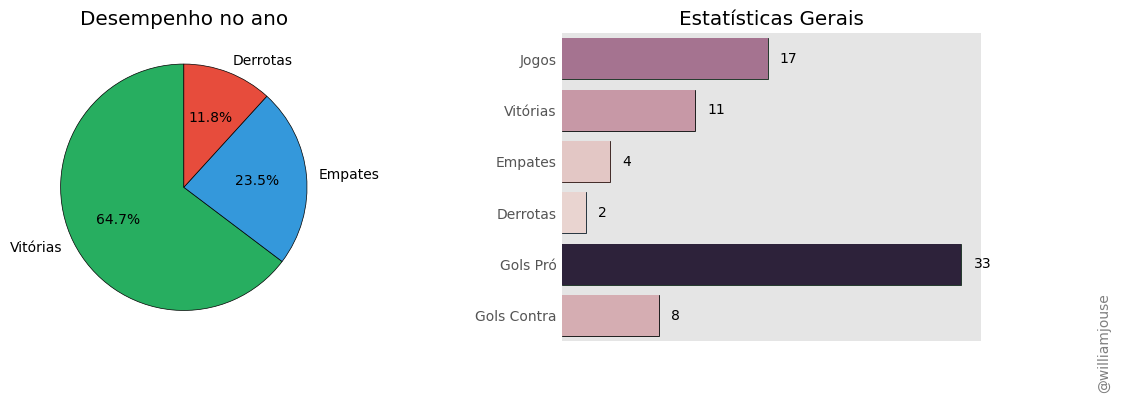

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))

vitorias = stats.resultado.value_counts().iloc[0]
empates = stats.resultado.value_counts().iloc[1]
derrotas = stats.resultado.value_counts().iloc[2]

gols_pro = stats.gols_marcados.sum()
gols_contra = stats.gols_sofridos.sum()

total_jogos = vitorias + empates + derrotas

axs[0].pie([vitorias, empates, derrotas], labels=['Vitórias', 'Empates', 'Derrotas'], 
           autopct='%1.1f%%', startangle=90, colors=['#27AE60', '#3498DB', '#E74C3C'], wedgeprops={'edgecolor': 'black'})

axs[0].set_title('Desempenho no ano')

labels = ['Jogos', 'Vitórias', 'Empates', 'Derrotas', 'Gols Pró', 'Gols Contra']
values = [total_jogos, vitorias, empates, derrotas, gols_pro, gols_contra]
         
axs[1].barh(labels, values, color=['#27AE60', 'black', '#E74C3C', '#3498DB'], edgecolor='black')

for i, value in enumerate(values):
    axs[1].text(value + 1, i, str(value), va='center')
    
import seaborn as sns    
sns.barplot(x=values, y=labels, ax=axs[1], hue=values, legend=False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])


axs[1].set_title('Estatísticas Gerais')


plt.subplots_adjust(wspace=0.4)

plt.tick_params(length=0)


plt.figtext(1.0, 0.23, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.savefig('../figures/figure2.png', dpi = 300, bbox_inches='tight')


plt.show()

In [31]:
weekdays = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
agrupado2 = jogos.groupby(['weekday', 'resultado']).size().unstack().reindex(weekdays, axis=0).fillna(0)

vic = agrupado2['Vitória'].fillna(0).astype('Int64').to_list()
emp = agrupado2['Empate'].fillna(0).astype('Int64').to_list()
der = agrupado2['Derrota'].fillna(0).astype('Int64').to_list()
weekdays = agrupado2.index.to_list()
agrupado2

resultado,Derrota,Empate,Vitória
weekday,,,
Sun,2.0,2.0,1.0
Mon,0.0,0.0,0.0
Tue,0.0,0.0,0.0
Wed,0.0,0.0,4.0
Thu,0.0,1.0,1.0
Fri,0.0,0.0,0.0
Sat,0.0,1.0,5.0


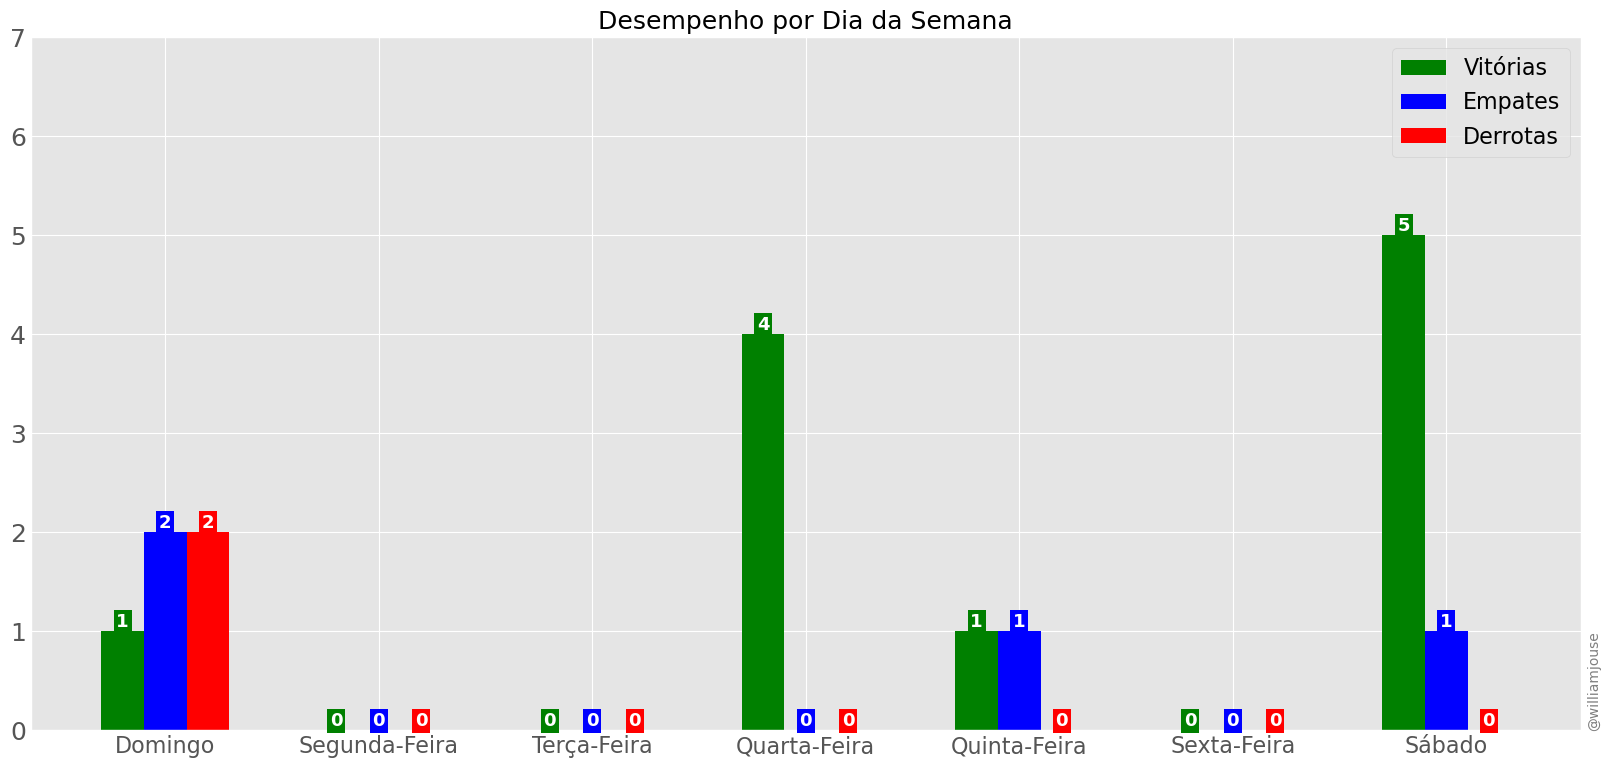

In [32]:
dias = ['Domingo', 'Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado']

x = range(len(dias))
largura_barra = 0.2

fig, ax = plt.subplots(figsize=(20, 9))

plt.title('Desempenho por Dia da Semana', fontsize=18)

plt.bar(x, vic, width=largura_barra, label='Vitórias', color='green')
plt.bar([i + largura_barra for i in x], emp, width=largura_barra, label='Empates', color='blue')
plt.bar([i + 2 * largura_barra for i in x], der, width=largura_barra, label='Derrotas', color='red')


for i, v in enumerate(vic):
    plt.text(i, v, str(v), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='green', edgecolor='none', pad=2))
for i, e in enumerate(emp):
    plt.text(i + largura_barra, e, str(e), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='blue', edgecolor='none', pad=2))
for i, d in enumerate(der):
    plt.text(i + 2 * largura_barra, d, str(d), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='red', edgecolor='none', pad=2))

plt.xticks([i + largura_barra for i in x], dias, fontsize=16)

plt.yticks(fontsize=18)
plt.ylim(0, max(vic + emp + der) + 2)

# Adicionando uma legenda
green_patch = mpatches.Patch(color='green', label='Vitórias')
blue_patch = mpatches.Patch(color='blue', label='Empates')
red_patch = mpatches.Patch(color='red', label='Derrotas')
plt.legend(handles=[green_patch, blue_patch, red_patch], fontsize=16)
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', fontsize=16)

plt.tick_params(length=0)

plt.figtext(.91, 0.22, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.legend(loc='upper right', fontsize=16)

plt.savefig('../figures/figure3.png', dpi = 300, bbox_inches='tight')

plt.show()

In [33]:
#jogos['Mês'] = jogos['kick-off'].dt.month_name()

agrupado = jogos.groupby(['month', 'resultado']).size().unstack().reindex(new_order, axis=0)


vic = agrupado['Vitória'].fillna(0).astype('Int64').to_list()
emp = agrupado['Empate'].fillna(0).astype('Int64').to_list()
der = agrupado['Derrota'].fillna(0).astype('Int64').to_list()
months = agrupado.index.to_list()

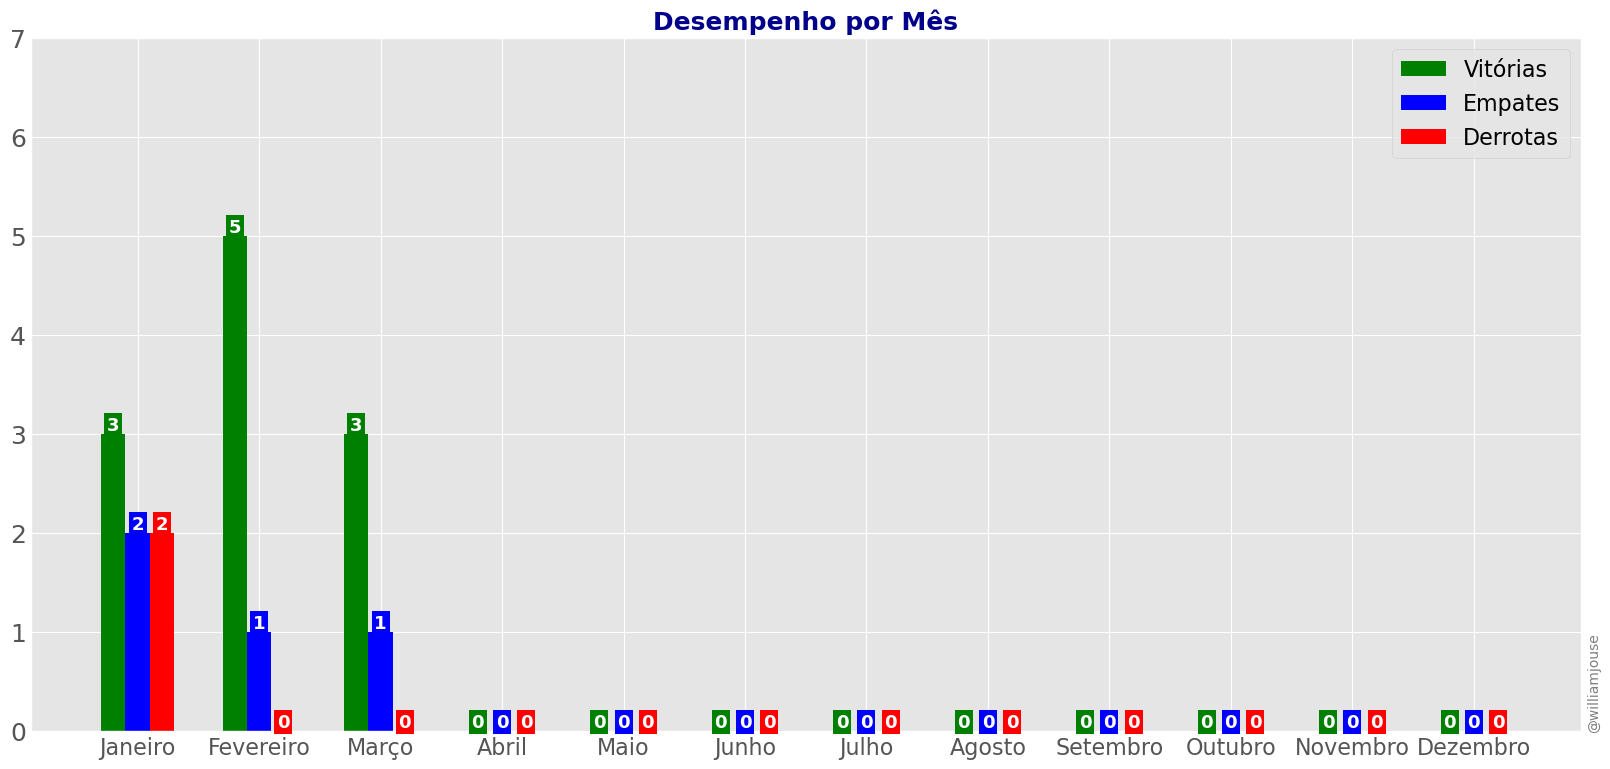

In [34]:
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

x = range(len(months))
largura_barra = 0.2

fig, ax = plt.subplots(figsize=(20, 9))

plt.title('Desempenho por Mês', fontsize=18, fontweight="bold", color="darkblue", loc="center")

plt.bar(x, vic, width=largura_barra, label='Vitórias', color='green')
plt.bar([i + largura_barra for i in x], emp, width=largura_barra, label='Empates', color='blue')
plt.bar([i + 2 * largura_barra for i in x], der, width=largura_barra, label='Derrotas', color='red')


for i, v in enumerate(vic):
    plt.text(i, v, str(v), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='green', edgecolor='none', pad=2))
for i, e in enumerate(emp):
    plt.text(i + largura_barra, e, str(e), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='blue', edgecolor='none', pad=2))
for i, d in enumerate(der):
    plt.text(i + 2 * largura_barra, d, str(d), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='red', edgecolor='none', pad=2))

plt.xticks([i + largura_barra for i in x], meses, fontsize=16)

plt.yticks(fontsize=18)
plt.ylim(0, max(vic + emp + der) + 2)

# Adicionando uma legenda
green_patch = mpatches.Patch(color='green', label='Vitórias')
blue_patch = mpatches.Patch(color='blue', label='Empates')
red_patch = mpatches.Patch(color='red', label='Derrotas')
plt.legend(handles=[green_patch, blue_patch, red_patch], fontsize=16)
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', fontsize=16)

plt.tick_params(length=0)

plt.figtext(.91, 0.22, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.legend(loc='upper right', fontsize=16)

plt.savefig('../figures/figure4.png', dpi = 300, bbox_inches='tight')

plt.show()

In [35]:
df_aux = pd.merge(jogos, gols, on = 'id_match').loc[:,['torneio', 'gols']]

df_aux3 = (pd.pivot_table(df_aux, columns = ['torneio'], index=['gols'], aggfunc = len, fill_value=0, margins=True)   # 'pivot' com margens 
   .sort_values('All', ascending=False)  # classificar por soma de linha
   .drop('All', axis=1)                  # elimine a coluna `All`
   .sort_values('All', ascending=False, axis=1) # classificar por soma de coluna
   .drop('All')    # eliminar linha `All`
)

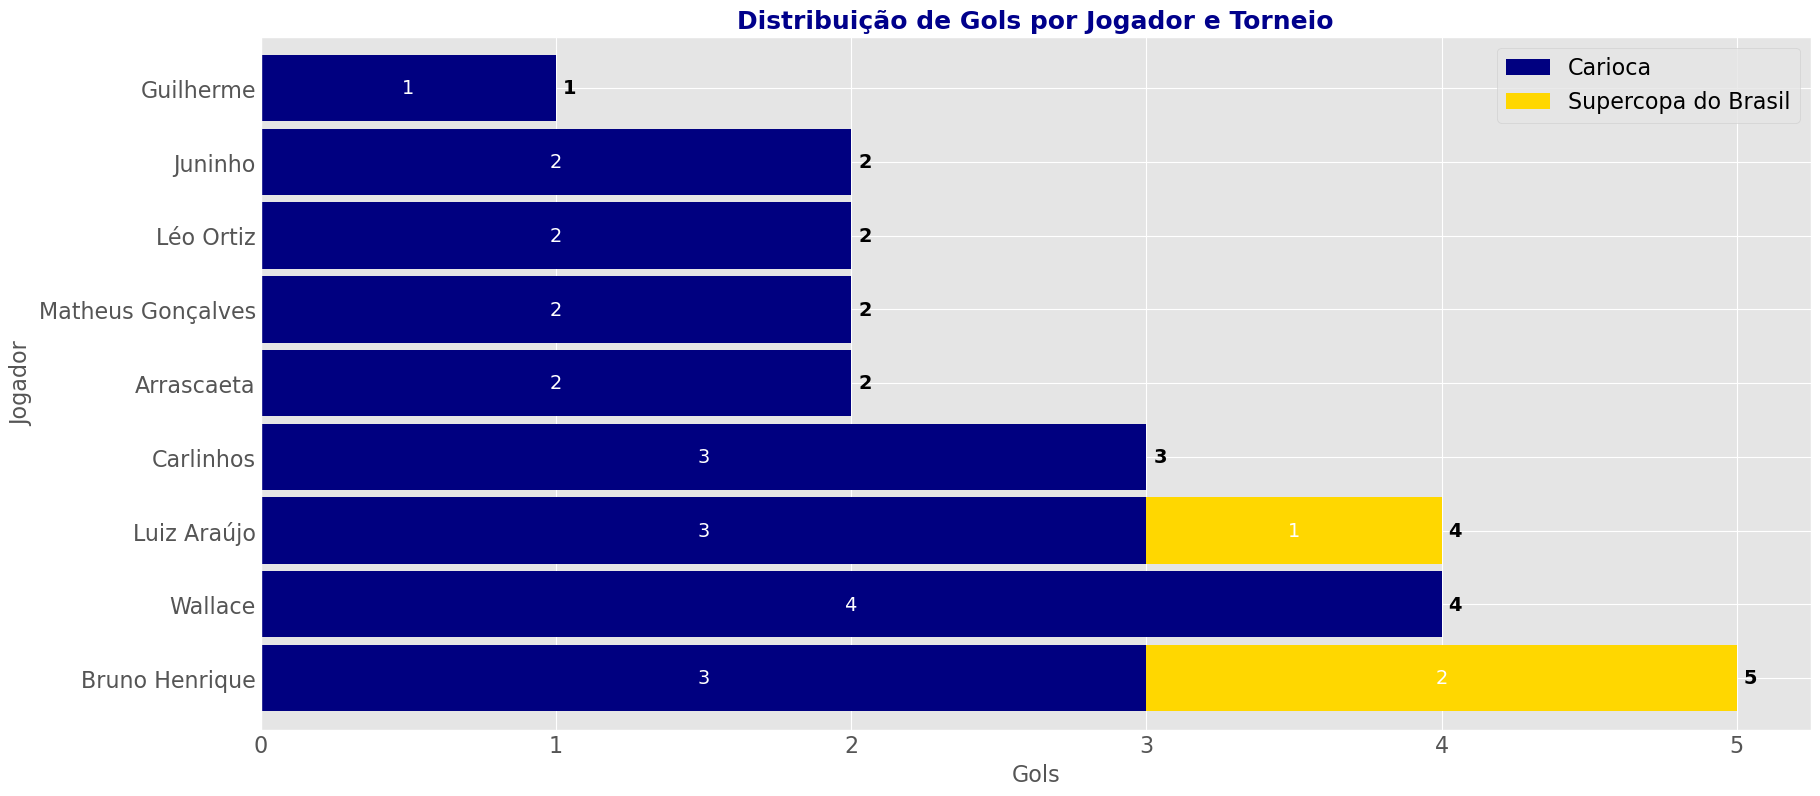

In [36]:
#fig, ax = plt.subplots(figsize=(20, 9))

ax = df_aux3.head(9).plot(
    kind="barh",  # Gráfico de barras horizontal
    stacked=True,  # Barras empilhadas
    figsize=(20, 9),  # Aumentar o tamanho da figura
    color=["navy", "gold", "darkred", "green", "skyblue"],  # Cores para cada torneio
    title="Distribuição de Gols por Jogador e Torneio",
    width=0.9# Título do gráfico
)

# Personalizar o título
ax.set_title("Distribuição de Gols por Jogador e Torneio",
             fontsize=18, fontweight="bold", color="darkblue", loc="center")

# Personalizar o eixo X
plt.xlabel("Gols", fontsize=16)
plt.xticks(fontsize=16)

# Personalizar o eixo Y
plt.ylabel("Jogador",  fontsize=16)
plt.yticks( fontsize=16)

# Adicionar a legenda com título e posicionamento
plt.legend(loc='upper right', fontsize=16)

# Adicionar valores dentro das barras
# Adicionar valores diretamente usando os dados do DataFrame
for i, jogador in enumerate(df_aux3.index[:10]):  # Iterar sobre os 10 primeiros jogadores
    acumulado = 0  # Inicializa a posição acumulada para cada barra
    for torneio in df_aux3.columns:  # Iterar sobre os torneios
        valor = df_aux3.loc[jogador, torneio]
        if valor > 0:  # Apenas adicionar rótulos para valores maiores que zero
            ax.annotate(
                f"{int(valor)}",  # Texto do valor
                xy=(acumulado + valor / 2, i),  # Posição no centro da barra
                ha="center", va="center",  # Alinhamento horizontal e vertical
                fontsize=14, color="white"  # Estilo do texto
            )
            acumulado += valor  # Atualizar a posição acumulada

for i, jogador in enumerate(df_aux3.index[:10]):  # Iterar sobre os 10 primeiros jogadores
    total = df_aux3.loc[jogador].sum()  # Soma total de gols do jogador
    ax.annotate(
        f"{int(total)}",  # Texto do total de gols
        xy=(total, i),  # Posição no final da barra
        xytext=(5, 0),  # Deslocamento do texto em relação ao ponto
        textcoords="offset points",  # Coordenadas baseadas no deslocamento
        ha="left", va="center",  # Alinhamento horizontal e vertical
        fontsize=14, color="black", fontweight="bold"  # Estilo do texto
    )


# Ajustar margens para melhorar visualização
plt.tick_params(length=0)

# Exibir o gráfico
plt.show()